# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education. 

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms. 
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers, 
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn. 
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc 
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status? 
3. The company uses multiple modes to interact with prospects. Which way of interaction works best? 
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

## Step 1: Import necessary libraries and dataset 

In [215]:
# Import Modules 
import pandas as pd
import numpy as np
from pathlib import Path

# Visualization 
import seaborn as sns
import matplotlib.pyplot as plt

# Set up visualisation styles
# Display plots within notebook
%matplotlib inline 
sns.set_style("whitegrid")

# Normalization for Logistic regression(as basemodel)
# Usually, random forest model doesn't need scaling
from sklearn.preprocessing import StandardScaler

# Import ML models
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Visualisation for decision tree
import pydotplus
from IPython.display import Image

In [216]:
# Load the dataset
data = Path('ExtraaLearn.csv')
df = pd.read_csv(data)


In [217]:
# Review DataFrame
df

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.170,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.393,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.692,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.879,Website Activity,Yes,No,No,No,No,0


## Step 2: Understand Data Structure


In [218]:
# Check for missing values 
df.isna().sum()

ID                       0
age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
status                   0
dtype: int64

In [219]:
# Check for duplicate values
df.duplicated().sum()

0

In [220]:
# Get summary of the dataset
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

(4612, 15)

In [221]:
# Get statistical summary 
df.describe()

,age,website_visits,time_spent_on_website,page_views_per_visit,status
count,4612.000000,4612.000000,4612.000000,4612.000000,4612.000000
mean,46.201214,3.566782,724.011275,3.026126,0.298569
std,13.161454,2.829134,743.828683,1.968125,0.457680
min,18.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,2.000000,148.750000,2.077750,0.000000
50%,51.000000,3.000000,376.000000,2.792000,0.000000
75%,57.000000,5.000000,1336.750000,3.756250,1.000000
max,63.000000,30.000000,2537.000000,18.434000,1.000000


#### Initial data summary:

The dataset is well structured, clean, with no missing or duplicate entries across 4612 entries(rows) and 15 columns(features).

**Observation of the statistics reveals:**
 * A broad age range, from 18 to 63 among leads.
 * Diverse engagement levels with the website visits range from 0 to 30.
 * Time spent on the website varies significantly, ranging from 0 to 2537.
 * Page visits have an average of about 3 pages, suggesting how many pages a lead views in a single visit.
 * Status indeicates a lower overall conversion rate with approximately 30%.
 


## Step 3 : Exploratory Data Analysis(EDA)


### 3.1 Distribution of individual features:



In [222]:
# Check number of unique ID vlues
len(df['ID'].unique())


4612

In [223]:
# Drop ID column(it's irrelevant for our analysis ), copy DF. 
df = df.drop(columns = 'ID').copy()

In [224]:
df

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4607,35,Unemployed,Mobile App,Medium,15,360,2.170,Phone Activity,No,No,No,Yes,No,0
4608,55,Professional,Mobile App,Medium,8,2327,5.393,Email Activity,No,No,No,No,No,0
4609,58,Professional,Website,High,2,212,2.692,Email Activity,No,No,No,No,No,1
4610,57,Professional,Mobile App,Medium,1,154,3.879,Website Activity,Yes,No,No,No,No,0


In [225]:
# Define columns with continous variables
continuous_vars = df.select_dtypes(include=['int64','float64']).columns

In [226]:
# Calculate number of continous var
len(continuous_vars)

5

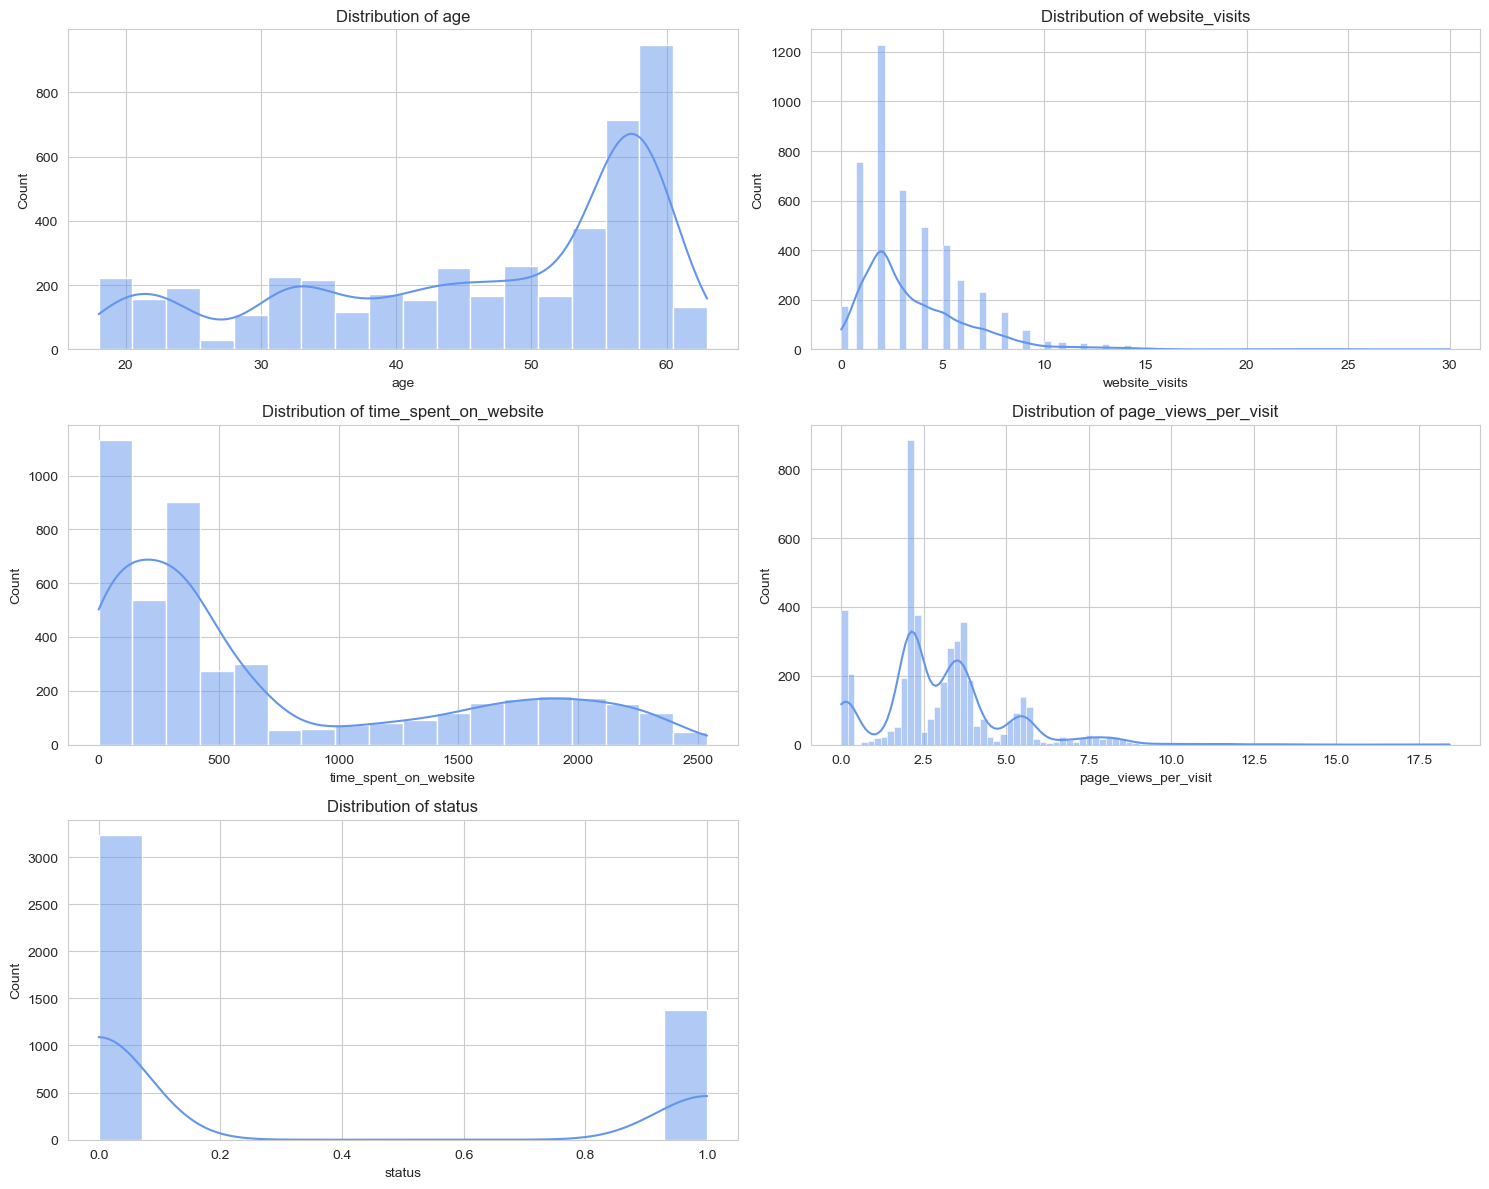

In [227]:
# Plot distribution for continous variables
plt.figure(figsize=(15,12))

# Create a subplot for each variable
for i, var in enumerate(continuous_vars):
    plt.subplot(3,2,i+1)
    sns.histplot(df[var], kde=True, color='cornflowerblue')
    plt.title(f'Distribution of {var}')

# Adjust layout to prevent overlapping    
plt.tight_layout()

# Save plots
plt.savefig('images/continuous_variables_distribution.png',  dpi=300)

# Show plots
plt.show()
    

#### Summary of continuous variables distrubution:
**1. Age distribution:**
* Shows a broad distribution range with noticeable drop at 25-30 and peak in the 51-57 age group.
* This pattern suggests to focus on these age groups in marketing efforts.

**2. Web site visits:**
* Initial engagement is higher, with a notable decline in frequency after 3 visits.
* This trend indicates a need for strategies to improve user retention.

**3. Time spent on the website:**
* Fluctuating engagement with significant peaks at around 100, 370, and lesser peak at 2000 minutes.
* This suggests that while the majority of users may not spend extended periods on the website, there is a smaller segment of users who engage for longer durations.It's highlighting the potential for targeted engagement strategies.

**4. Page views per visit:**
* Notable peaks at 2.3, 3.7 and 5.5 pages, indicating the key engagement content.
* Suggests the content that is keeping people engaged. 

**5. Status distribution:**
* About 27% leads convert to customers.
* Indicates scope for improving lead conversion strategies.

In [197]:
# Define columns with categorical variables
categorical_vars = df.select_dtypes(include='object').columns

In [198]:
# Calculate number of catecorial var
len(categorical_vars)

9

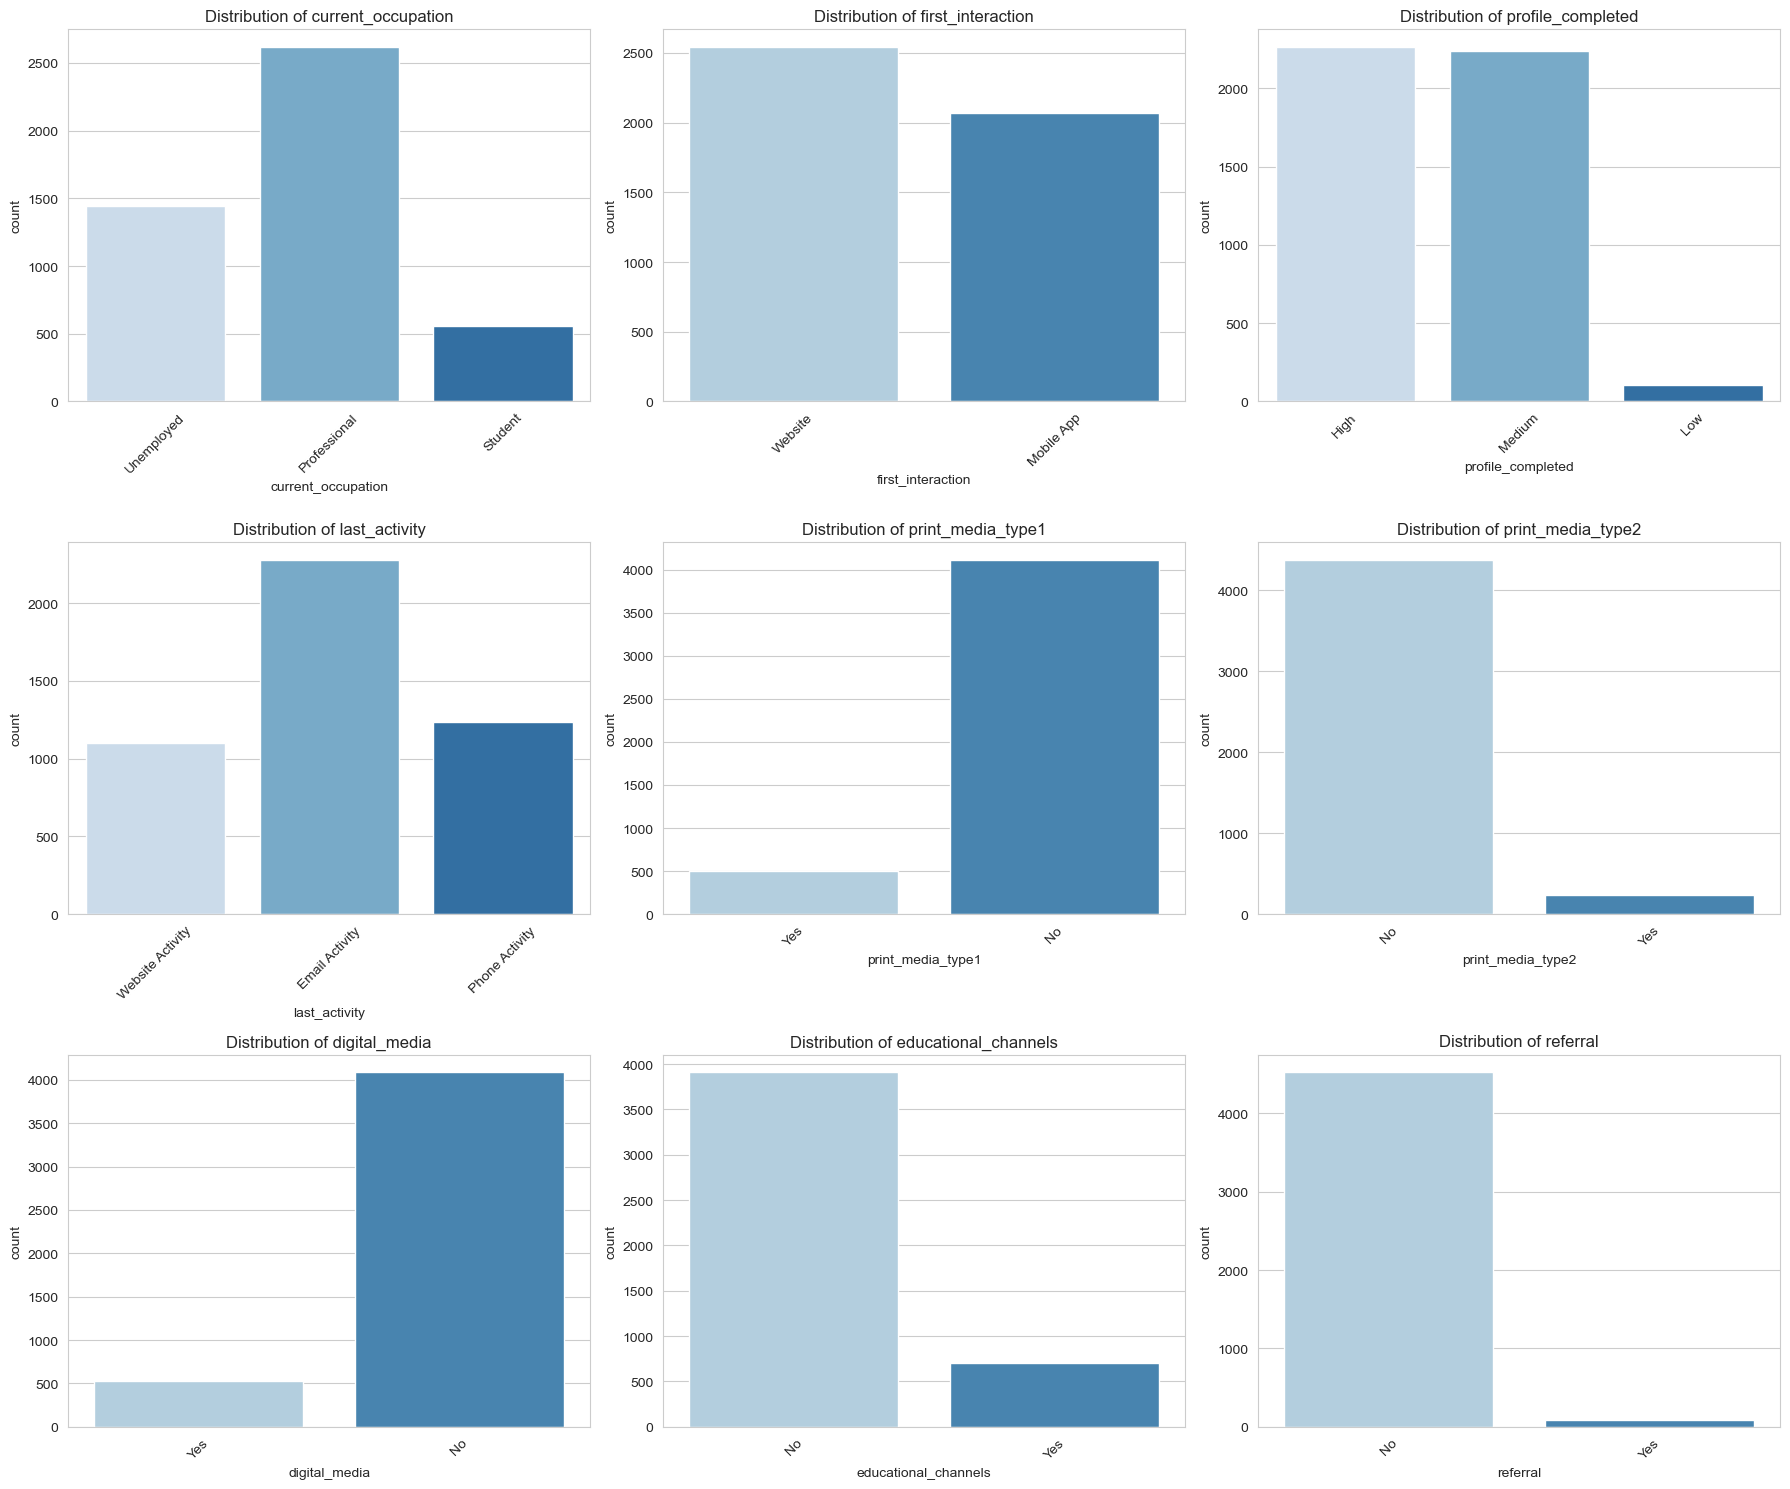

In [199]:
# Plot distribution for categorical variables
plt.figure(figsize=(18,15))

# Create a subplot for each variable
for i, var in enumerate(categorical_vars):
    plt.subplot(3,3,i +1)
    sns.countplot(data=df, x=var, palette="Blues")
    plt.title(f'Distribution of {var}')
    plt.xticks(rotation=45)
    
# Adjust layout to prevent overlapping    
plt.tight_layout()
    
# Save plots
plt.savefig('images/categorical_variables_distribution.png',  dpi=300)

# Show plots
plt.show()

#### Summary of Categorical Variables Distribution :
**1. Current occupation:**
* Dominated by professionals, followed by unemployed, then students.
* Suggests the platform is more appealing to working professionals.

**2. First interaction:**
* Website interactions lead over mobile app engagements.
* Indicates the importance of a strong online presence and potential for the mobile app improvement.

**3. Profile completion:**
* High account completion rates surpass medium (2150 count) and low completion (100 count). 
* Implies that detailed profiles could be a significant indicator of lead quality.

**4. Last activity:**
* Email activity is most common, followed by phone and website. 
* Suggests email as a crucial engagement channel for leads.

**5. Print media Type 1:**
* Shows a lower conversion rate (500 count)compared to non-converted leads (4100 count). 
* Suggests limited effectiveness in this lead conversion.

**6. Print media Type 2:**
* Even lower conversion rate (100 count) against non-converted leads (4500 count). 
* Indicating a need for re-evaluation of this channel's effectiveness.

**7. Digital media:**
* Shows low conversion rate (500 count) versus non-conversion (4100 count).  
* Points to the potential need for digital strategy optimization.

**8. Educational channels:**
* Higher non-conversion rate (3700 count) compared to conversions (600 count). 
* Suggests opportunities for enhancing educational outreach, particularly as it shows the highest conversion rate.

**9. Referral:**
* Predominantly non-converted leads (4700 count) with minimal conversions (50 count). 
* Indicating referral programs may require enhancements to boost effectiveness.

### 3.2 Analysis of Lead Conversion ('status'):
We'll identify if certain ranges of continuous values are more associated with converted leads.

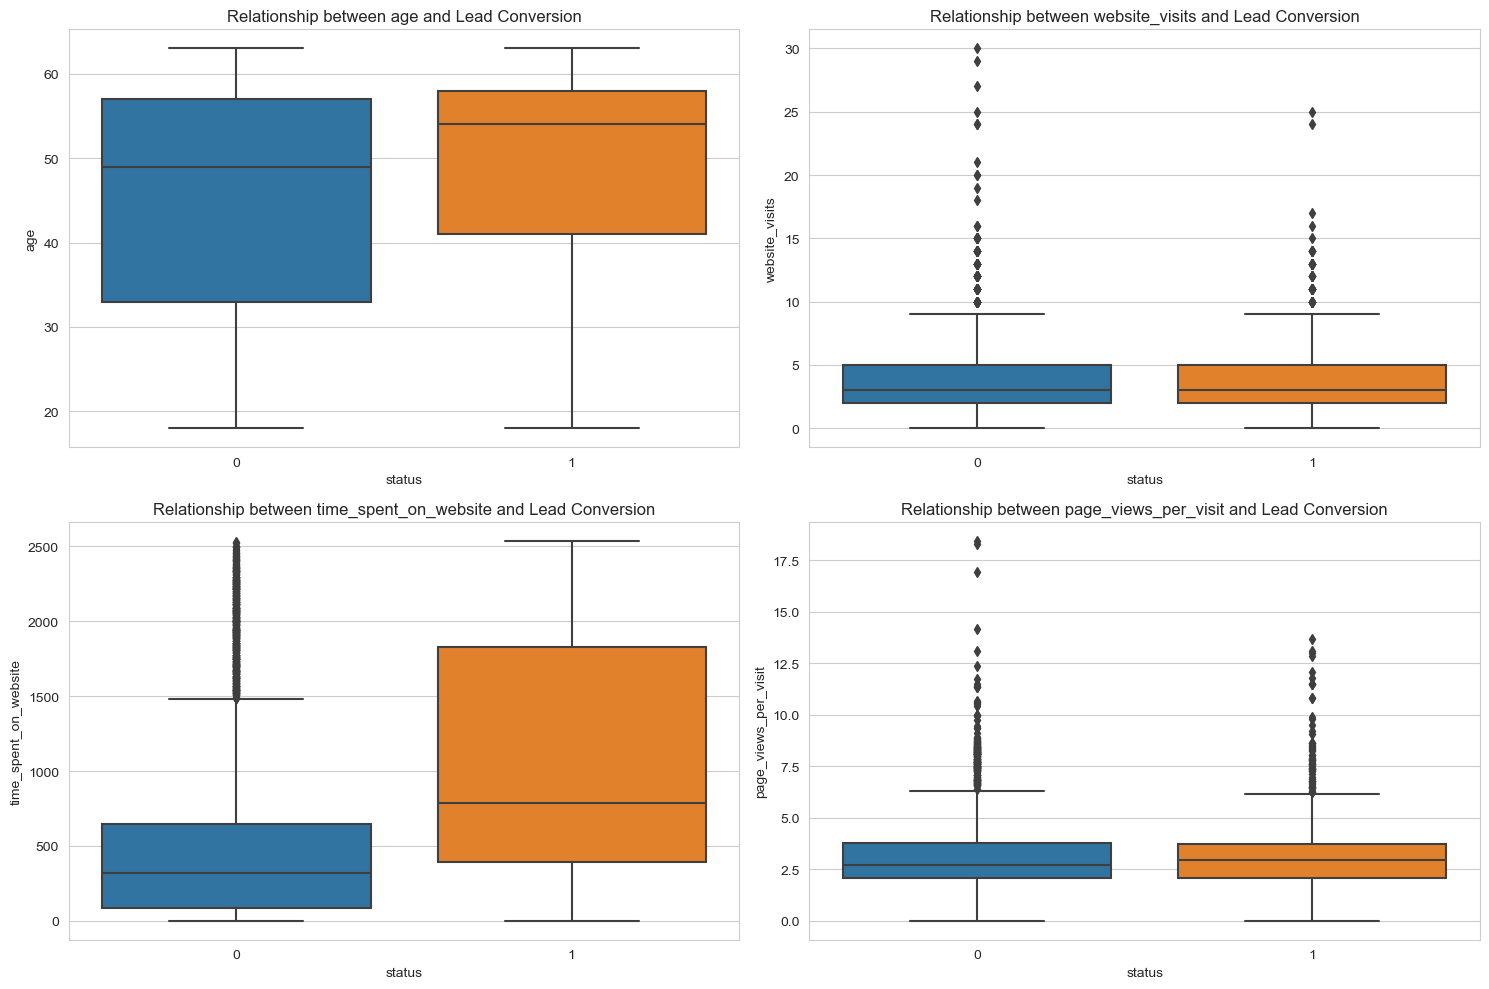

In [228]:
# Create box plots
plt.figure(figsize=(15, 10))
for i, var in enumerate(['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='status', y=var, data=df)
    plt.title(f'Relationship between {var} and Lead Conversion')
    
# Adjust layout to prevent overlapping    
plt.tight_layout()
    
# Save plots
plt.savefig('images/lead_conversion_relationships.png',  dpi=300)

# Show plots
plt.show()

#### Summary of Box Plot Analysis for Lead Conversion:
**1. Age and Conversion:**
* Non-converted leads span 18 to 57 years with a median of 48. Converted leads cluster around 42 to 57 years with a median of 54.
* Indicating older individuals are more likely to convert.

**2. Website visits and Conversion:**
* Both converted and non-converted leads show similar patterns in website visits, mainly between 0 to 9, with a median of around 4 visits and outliers ranging from 10 to 30 visits.
* The presence of outliers suggests that a smaller segment of leads shows higher website engagement.

**3. Time spent on website and Conversion:**
* Converted leads generally spend more time on the website, averaging around 700 minutes, compared to non-converted leads with a median time of 300 minutes.
* It indicates a need for website content and user experience enhancement to increase dwell time, influencing lead conversion positively. Notable outliers for non-converted leads indicate instances of high engagement without conversion, suggesting further investigation.

**4. Page views per visit and Conversion:**
* Both groups have a median of around 3 to 3.2 page views per visit, with outliers ranging up to 18 visits for non-converted leads and 14 for converted leads. 
* Indicates a potential to explore content and layout strategies to increase page views per visit. Outliers indicate occasional high engagement levels, suggesting potential leads that might be converted in the future.

### 3.3 Bivariate Analysis:
We'll explore which categories have a higher likelihood of converting to paid customers.

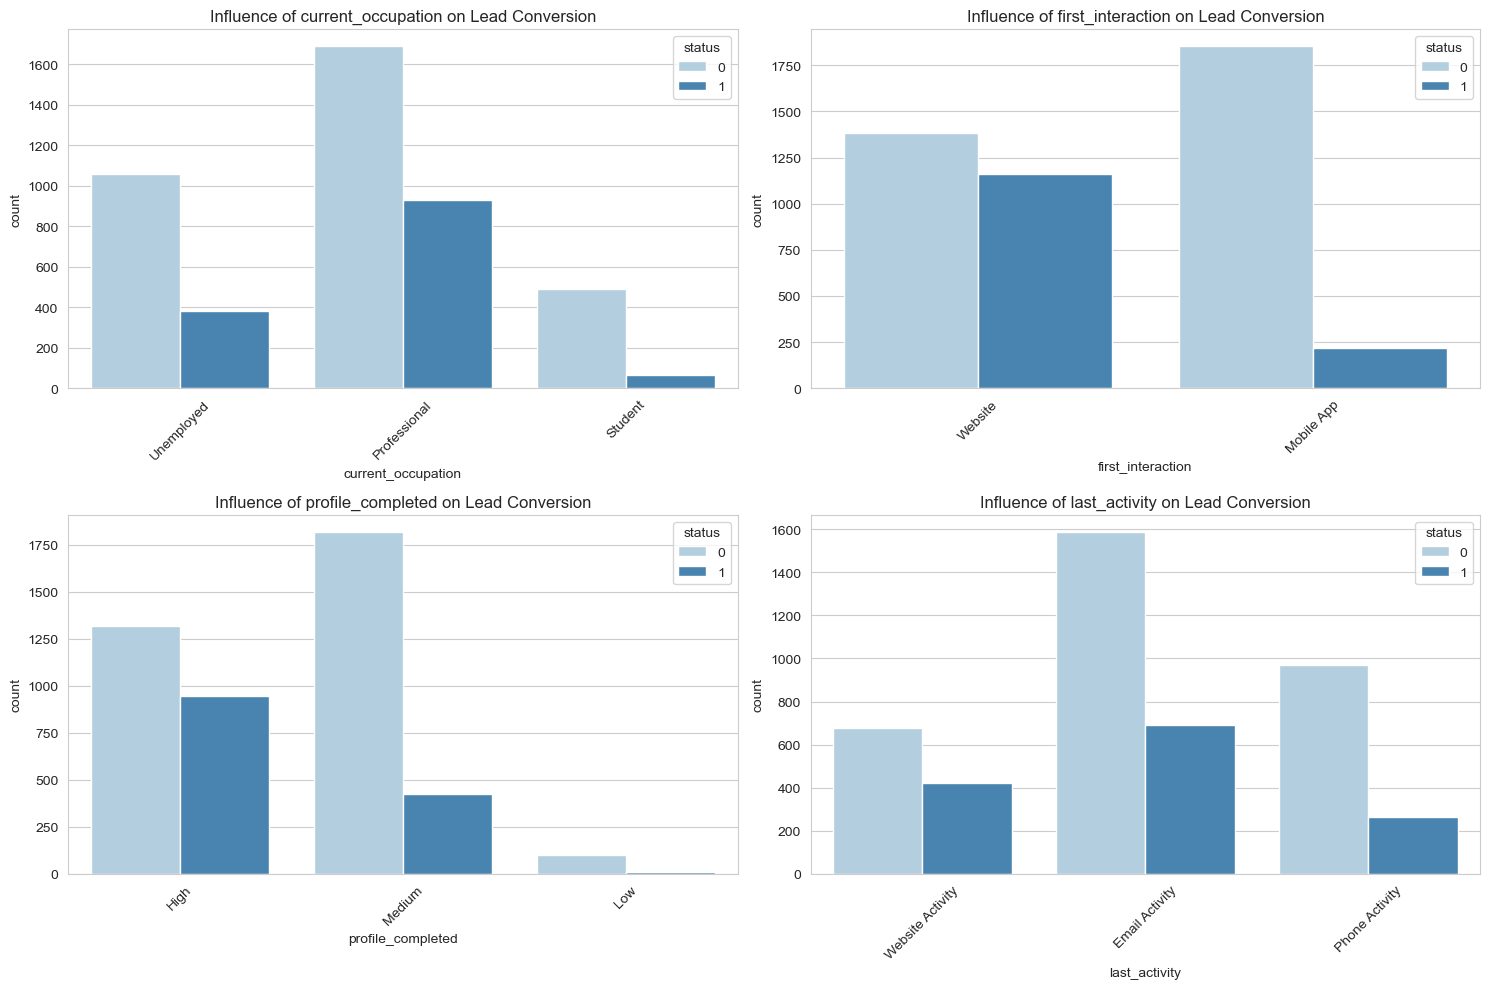

In [214]:
# Create count plots
plt.figure(figsize=(15, 10))
for i, var in enumerate(['current_occupation', 'first_interaction', 'profile_completed','last_activity']): 
    plt.subplot(2, 2, i + 1)
    sns.countplot(x=var, hue='status', data=df, palette="Blues")
    plt.title(f'Influence of {var} on Lead Conversion')
    plt.xticks(rotation=45)

# Adjust layout to prevent overlapping    
plt.tight_layout()
    
# Save plots
plt.savefig('images/lead_conversion_influence.png',  dpi=300)

# Show plots
plt.show()

#### Summary of Count Plot Analysis for Lead Conversion:
**1. Current ooccupation and Conversion:**
* Professionals show the highest conversion, suggesting strategies focused on this demographic may increase overall conversions.
* Unemployed and student groups have lower conversion rates, indicating a potential to develop targeted approaches for these segments.

**2.First interaction and Conversion:**
* Website interactions lead to higher conversion rates, highlighting the importance of a robust online platform for lead engagement.
* Mobile app interactions have lower conversions, suggesting the need for app optimization to enhance user experience and conversion rates.

**3. Profile completion and Conversion:**
* High and medium profile completions correlate with higher conversions, indicating that encouraging detailed profile completion may enhance lead quality and conversion likelihood.
* Low completion rates show minimal conversions, highlighting the importance of user engagement and profile optimization.

**4. Last activity and Conversion:**
* Email activity leads in conversion rates, suggesting the effectiveness of email marketing in lead conversion.
* Website and phone activities show lesser conversions, pointing towards potential areas for strategic improvements in communication and web site engagement.


Correlation Matrix:


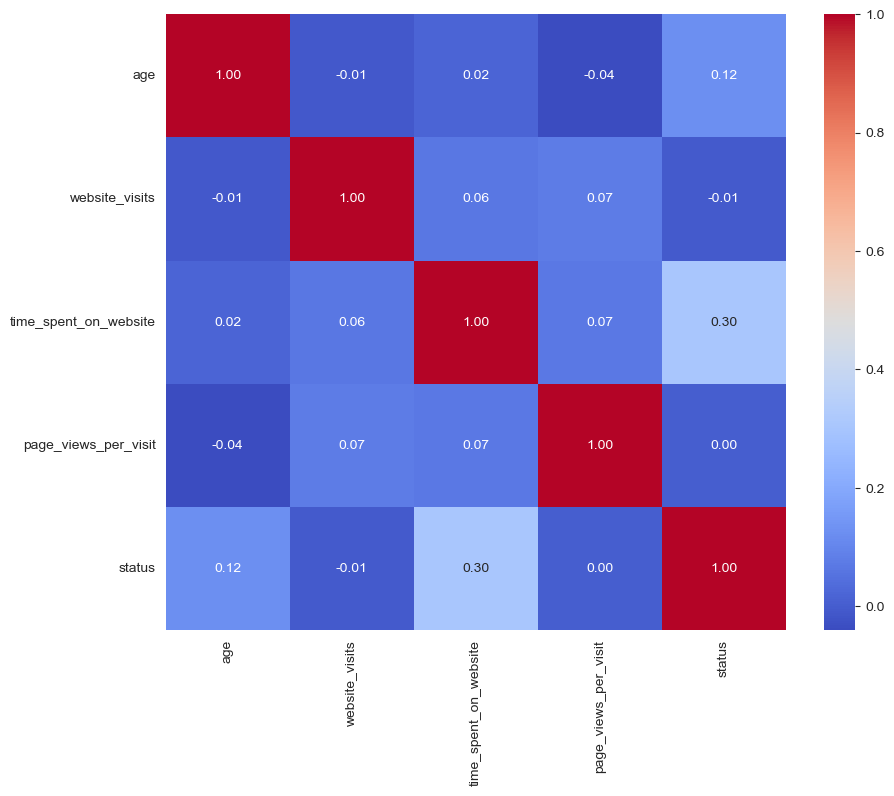

In [22]:
# Create Correlation Matrix
print("\nCorrelation Matrix:")
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

4612

In [ ]:
# Decision tree doesn't need scaling because desidions are not based on arithmetical operations

In [57]:
# # Install librarie for decidion tree visualization 
# %conda install python-graphviz -y 
# Draw graph = pydotplus.graph_from_data("your_model")
# #Show graph 
# Image(graph.create_png())
# # Save graph
# file_path = ("../Test_assesment/decidion_tree_graph.png")
# graph.write_png(file_path)

In [58]:
# Explore Grid Search optimization function for Random forest to find optimal value of e-estimators
# Set random state for replicating the same results of the model in the future

In [ ]:
# # Calculate feature importance 
# importance = your_rf_model.feature_importances_

In [60]:
# # Zip the feature importances with the assosiated feature name
# important_features = zip(X.columns,your_rf_model.feature_importances_)
# important_features

In [ ]:
# # Create a dataframe of the important features
# importances_df = pd.DataFrame(important_features)

# # Rename the columns 
# importances_df = importances_df.rename(columns={0: 'Feature', 1: 'Importance'})

# # Set index 
# importances_df = importances_df.set_index('Feature')

# # Sort the dataframe by feature importance
# importances_df = importances_df.sort_values(by='Importance', ascending=False)

In [ ]:
# # Plot the top 10 most important features
# importances_df[0:10].plot(
#     kind='brah',
#     color='lightgreen',
#     title='Feature Importance',
#     legend=True)


In [ ]:
# # Get count on inportant features
# importances_df.head()

In [87]:
# # Confusio matrix
# TN = matrix[0,0]
# FP = matrix[0,1]
# FN = matrix[1,0]
# TP = matrix[1,1]
# Specificity =  round(TN / (FP + TN), 4) # True Negative Rate 
# FPR  = round(FP / (FP + TN), 4)
# Confidence = round(1 - FPR, 4)
# Precision = TP / (FP + TP)
# Recall_Power = round(TP / (TP + FN), 4) #Sensitivity or TPR
# G_mean = (Specificity * Recall_Power) **(1/2) 
# Accuracy = round((TP + TN) / (TP +FP + TN + FN), 4)
# f1_score = 2 * (Precision * Recall_Power) / (Precision + Recall_Power)

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

## EDA

- It is a good idea to explore the data once again after manipulating it.

## Building a Decision Tree model

## Do we need to prune the tree?

## Building a Random Forest model

## Do we need to prune the tree?

## Actionable Insights and Recommendations